Descripción:

@Author: Juan Camilo Mancipe Cuevas
@Date: 2022/02/27
@Description: This notebook will show exercises with regression logistics scikikit-learn

#Regresión Logistíca con SCIKIT-LEARN
Regresíon Logística Ejercicio 1
Conociendo el dataset, el profesor "Freddy Michael Kruege Myres", no tiene claro que tiempo recomendarles a sus estudiantes para que estudien para el examen y con ello garantizar las mejores notas. Por lo tanto recolecta la base de datos con los útimos 2000 exámenes donde están las horas que estudiaron y si aprobó o no.

En la variante de este ejercicio se presenta el caso de horas de tutoria para cada celda.

La base de datos esta disponible en:

Horas de Estudio diario y Tutorías por mes vs Aprobación

#Importar Librerías y DATA

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn import metrics

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.DataFrame()
data = pd.read_csv(
    "https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/1-Machine_Learning_Classic/Databasets/mercadeo_bancario.csv", 
    encoding='utf-8')

#Conocer la DATA

In [ ]:
data.info

<bound method DataFrame.info of        edad      trabajo  ... numero_empleados si_no
0        44  blue-collar  ...               88     0
1        53   technician  ...               14     0
2        28   management  ...             1993     1
3        39     services  ...             1338     0
4        55      retired  ...             1184     1
...     ...          ...  ...              ...   ...
41183    59      retired  ...              664     0
41184    31    housemaid  ...              736     0
41185    42       admin.  ...               43     0
41186    48   technician  ...             1068     0
41187    25      student  ...             1979     0

[41188 rows x 19 columns]>

In [ ]:
data.describe()

,edad,total_hijos,valor_prestamo,dias_ultimo_pago,tarjetas_credito,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.00000,41188.000000,41188.000000,41188.000000
mean,40.02406,3.984680,149706.676751,0.336409,2.497524,258.285010,26.35117,0.172963,1002.421652,0.112654
std,10.42125,2.583405,166028.840792,4.478984,1.703683,259.279249,29.94257,0.494901,577.707188,0.316173
min,17.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,32.00000,2.000000,0.000000,0.000000,1.000000,102.000000,0.00000,0.000000,504.000000,0.000000
50%,38.00000,4.000000,81778.500000,0.000000,2.000000,180.000000,13.00000,0.000000,1001.000000,0.000000
75%,47.00000,6.000000,290938.500000,0.000000,4.000000,319.000000,52.00000,0.000000,1506.000000,0.000000
max,98.00000,8.000000,499992.000000,90.000000,5.000000,4918.000000,90.00000,7.000000,2000.000000,1.000000


In [ ]:
data.isnull().sum()

edad                        0
trabajo                     0
estado_civil                0
educacion                   0
total_hijos                 0
credito_sin_pago            0
prestamo_vivienda           0
prestamo_personal           0
valor_prestamo              0
dias_ultimo_pago            0
tarjetas_credito            0
contacto                    0
mes                         0
dia_semana                  0
duracion_ultimo_contacto    0
dias_ultimo_contacto        0
anterior_contacto           0
numero_empleados            0
si_no                       0
dtype: int64

In [ ]:
data.head(5)

,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,dias_ultimo_pago,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
0,44,blue-collar,married,preschool,7,unknown,yes,no,268017,0,5,cellular,aug,thu,210,43,0,88,0
1,53,technician,married,unknown,1,no,no,no,0,0,0,cellular,nov,fri,138,0,0,14,0
2,28,management,single,university.degree,3,no,yes,no,308036,0,0,cellular,jun,thu,339,27,2,1993,1
3,39,services,married,Technological_school,1,no,no,no,0,0,4,cellular,apr,fri,185,0,0,1338,0
4,55,retired,married,preschool,2,no,yes,no,249888,0,4,cellular,aug,fri,137,2,1,1184,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edad                      41188 non-null  int64 
 1   trabajo                   41188 non-null  object
 2   estado_civil              41188 non-null  object
 3   educacion                 41188 non-null  object
 4   total_hijos               41188 non-null  int64 
 5   credito_sin_pago          41188 non-null  object
 6   prestamo_vivienda         41188 non-null  object
 7   prestamo_personal         41188 non-null  object
 8   valor_prestamo            41188 non-null  int64 
 9   dias_ultimo_pago          41188 non-null  int64 
 10  tarjetas_credito          41188 non-null  int64 
 11  contacto                  41188 non-null  object
 12  mes                       41188 non-null  object
 13  dia_semana                41188 non-null  object
 14  duracion_ultimo_contac

In [ ]:
uniqueValues = data['credito_sin_pago'].unique()
print(sorted(uniqueValues))

['no', 'unknown', 'yes']


#Convertir Data Categorica en Data Numerica

In [ ]:
trabajo = {
    'unknown': 0,
    'admin.': 1, 
    'housemaid': 2, 
    'management': 3, 
    'retired': 4, 
    'self-employed': 5, 
    'student': 6, 
    'technician': 7, 
    'unemployed': 8,
    'blue-collar': 9,
    'services': 10,
    'entrepreneur': 11
    }
data['trabajo'] = data['trabajo'].map(trabajo)

In [ ]:
estado_civil = {
    'unknown': 0,
    'single': 1,
    'married': 2,
    'divorced' : 3
    }
data['estado_civil '] = data['estado_civil '].map(estado_civil)

In [ ]:
educacion = {
    'unknown': 0,
    'preschool': 1,
    'primary_school': 2,
    'tecnical_school': 3,
    'Technological_school': 4,
    'illiterate': 5,
    'professional.course': 6,
    'university.degree': 7
}
data['educacion'] = data['educacion'].map(educacion)

In [ ]:
credito_sin_pago = {
    'no': 0,
    'yes': 1,
    'unknown': 2
}
data['credito_sin_pago'] = data['credito_sin_pago'].map(credito_sin_pago)

In [ ]:
prestamo_vivienda = {
    'no': 0,
    'yes': 1,
    'unknown': 2
}
data['prestamo_vivienda'] = data['prestamo_vivienda'].map(prestamo_vivienda)

In [ ]:
prestamo_personal = {
    'no': 0,
    'yes': 1,
    'unknown': 2
}
data['prestamo_personal'] = data['prestamo_personal'].map(prestamo_personal)         

In [ ]:
contacto = {
    'cellular': 1,
    'telephone': 2,
}
data['contacto'] = data['contacto'].map(contacto)

In [ ]:
mes = {
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12,
}
data['mes'] = data['mes'].map(mes)

In [ ]:
dia_semana = {
    'sun': 1,
    'mon': 2,
    'tue': 3,
    'wed': 4,
    'thu': 5,
    'fri': 6,
    'sat': 7
}
data['dia_semana'] = data['dia_semana'].map(dia_semana)

#Convertir Data Categorica en Data Numerica V2 (usando preprocessing)

In [ ]:
from sklearn import preprocessing
le =preprocessing.LabelEncoder()  #instanciamos el Codificador

In [ ]:
le.fit(data['mes'])  #codificamos las categorias
list(le.classes_)

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [ ]:
le.transform(data['mes'])   #transformamos las categorias a valores numericos

array([5, 8, 3, ..., 2, 7, 2])

In [ ]:
data['trabajo']=le.fit_transform(data['trabajo'])  # (version rapida)
data['estado_civil ']=le.fit_transform(data['estado_civil '])  # (version rapida)
#data['educacion']=le.fit_transform(data['educacion'])  # (version rapida)
data['credito_sin_pago']=le.fit_transform(data['credito_sin_pago'])  # (version rapida)
data['prestamo_vivienda']=le.fit_transform(data['prestamo_vivienda'])  # (version rapida)
data['prestamo_personal']=le.fit_transform(data['prestamo_personal'])  # (version rapida)
data['contacto']=le.fit_transform(data['contacto'])  # (version rapida)
#data['mes']=le.fit_transform(data['mes'])  # (version rapida)
#data['dia_semana']=le.fit_transform(data['dia_semana'])  # (version rapida)

In [ ]:
uniqueValues = data['estado_civil '].unique()
print(uniqueValues)

[2 1 3 0]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   edad                      41188 non-null  int64
 1   trabajo                   41188 non-null  int64
 2   estado_civil              41188 non-null  int64
 3   educacion                 41188 non-null  int64
 4   total_hijos               41188 non-null  int64
 5   credito_sin_pago          41188 non-null  int64
 6   prestamo_vivienda         41188 non-null  int64
 7   prestamo_personal         41188 non-null  int64
 8   valor_prestamo            41188 non-null  int64
 9   dias_ultimo_pago          41188 non-null  int64
 10  tarjetas_credito          41188 non-null  int64
 11  contacto                  41188 non-null  int64
 12  mes                       41188 non-null  int64
 13  dia_semana                41188 non-null  int64
 14  duracion_ultimo_contacto  41188 non-nu

In [ ]:
data = data.fillna(0)

In [ ]:
data['mes'] = data['mes'].astype('int')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   edad                      41188 non-null  int64
 1   trabajo                   41188 non-null  int64
 2   estado_civil              41188 non-null  int64
 3   educacion                 41188 non-null  int64
 4   total_hijos               41188 non-null  int64
 5   credito_sin_pago          41188 non-null  int64
 6   prestamo_vivienda         41188 non-null  int64
 7   prestamo_personal         41188 non-null  int64
 8   valor_prestamo            41188 non-null  int64
 9   dias_ultimo_pago          41188 non-null  int64
 10  tarjetas_credito          41188 non-null  int64
 11  contacto                  41188 non-null  int64
 12  mes                       41188 non-null  int64
 13  dia_semana                41188 non-null  int64
 14  duracion_ultimo_contacto  41188 non-nu

#Graficar la Data

In [ ]:
data.describe()

,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,dias_ultimo_pago,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
count,41188.00000,41188.0,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.00000,41188.000000,41188.000000,41188.000000
mean,40.02406,0.0,1.827231,4.410969,3.984680,0.421336,0.571914,0.199767,149706.676751,0.336409,2.497524,0.365252,6.607896,3.979581,258.285010,26.35117,0.172963,1002.421652,0.112654
std,10.42125,0.0,0.608902,2.225748,2.583405,0.811128,0.541209,0.456002,166028.840792,4.478984,1.703683,0.481507,2.040998,1.411514,259.279249,29.94257,0.494901,577.707188,0.316173
min,17.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,32.00000,0.0,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.000000,3.000000,102.000000,0.00000,0.000000,504.000000,0.000000
50%,38.00000,0.0,2.000000,4.000000,4.000000,0.000000,1.000000,0.000000,81778.500000,0.000000,2.000000,0.000000,6.000000,4.000000,180.000000,13.00000,0.000000,1001.000000,0.000000
75%,47.00000,0.0,2.000000,7.000000,6.000000,0.000000,1.000000,0.000000,290938.500000,0.000000,4.000000,1.000000,8.000000,5.000000,319.000000,52.00000,0.000000,1506.000000,0.000000
max,98.00000,0.0,3.000000,7.000000,8.000000,2.000000,2.000000,2.000000,499992.000000,90.000000,5.000000,1.000000,12.000000,6.000000,4918.000000,90.00000,7.000000,2000.000000,1.000000


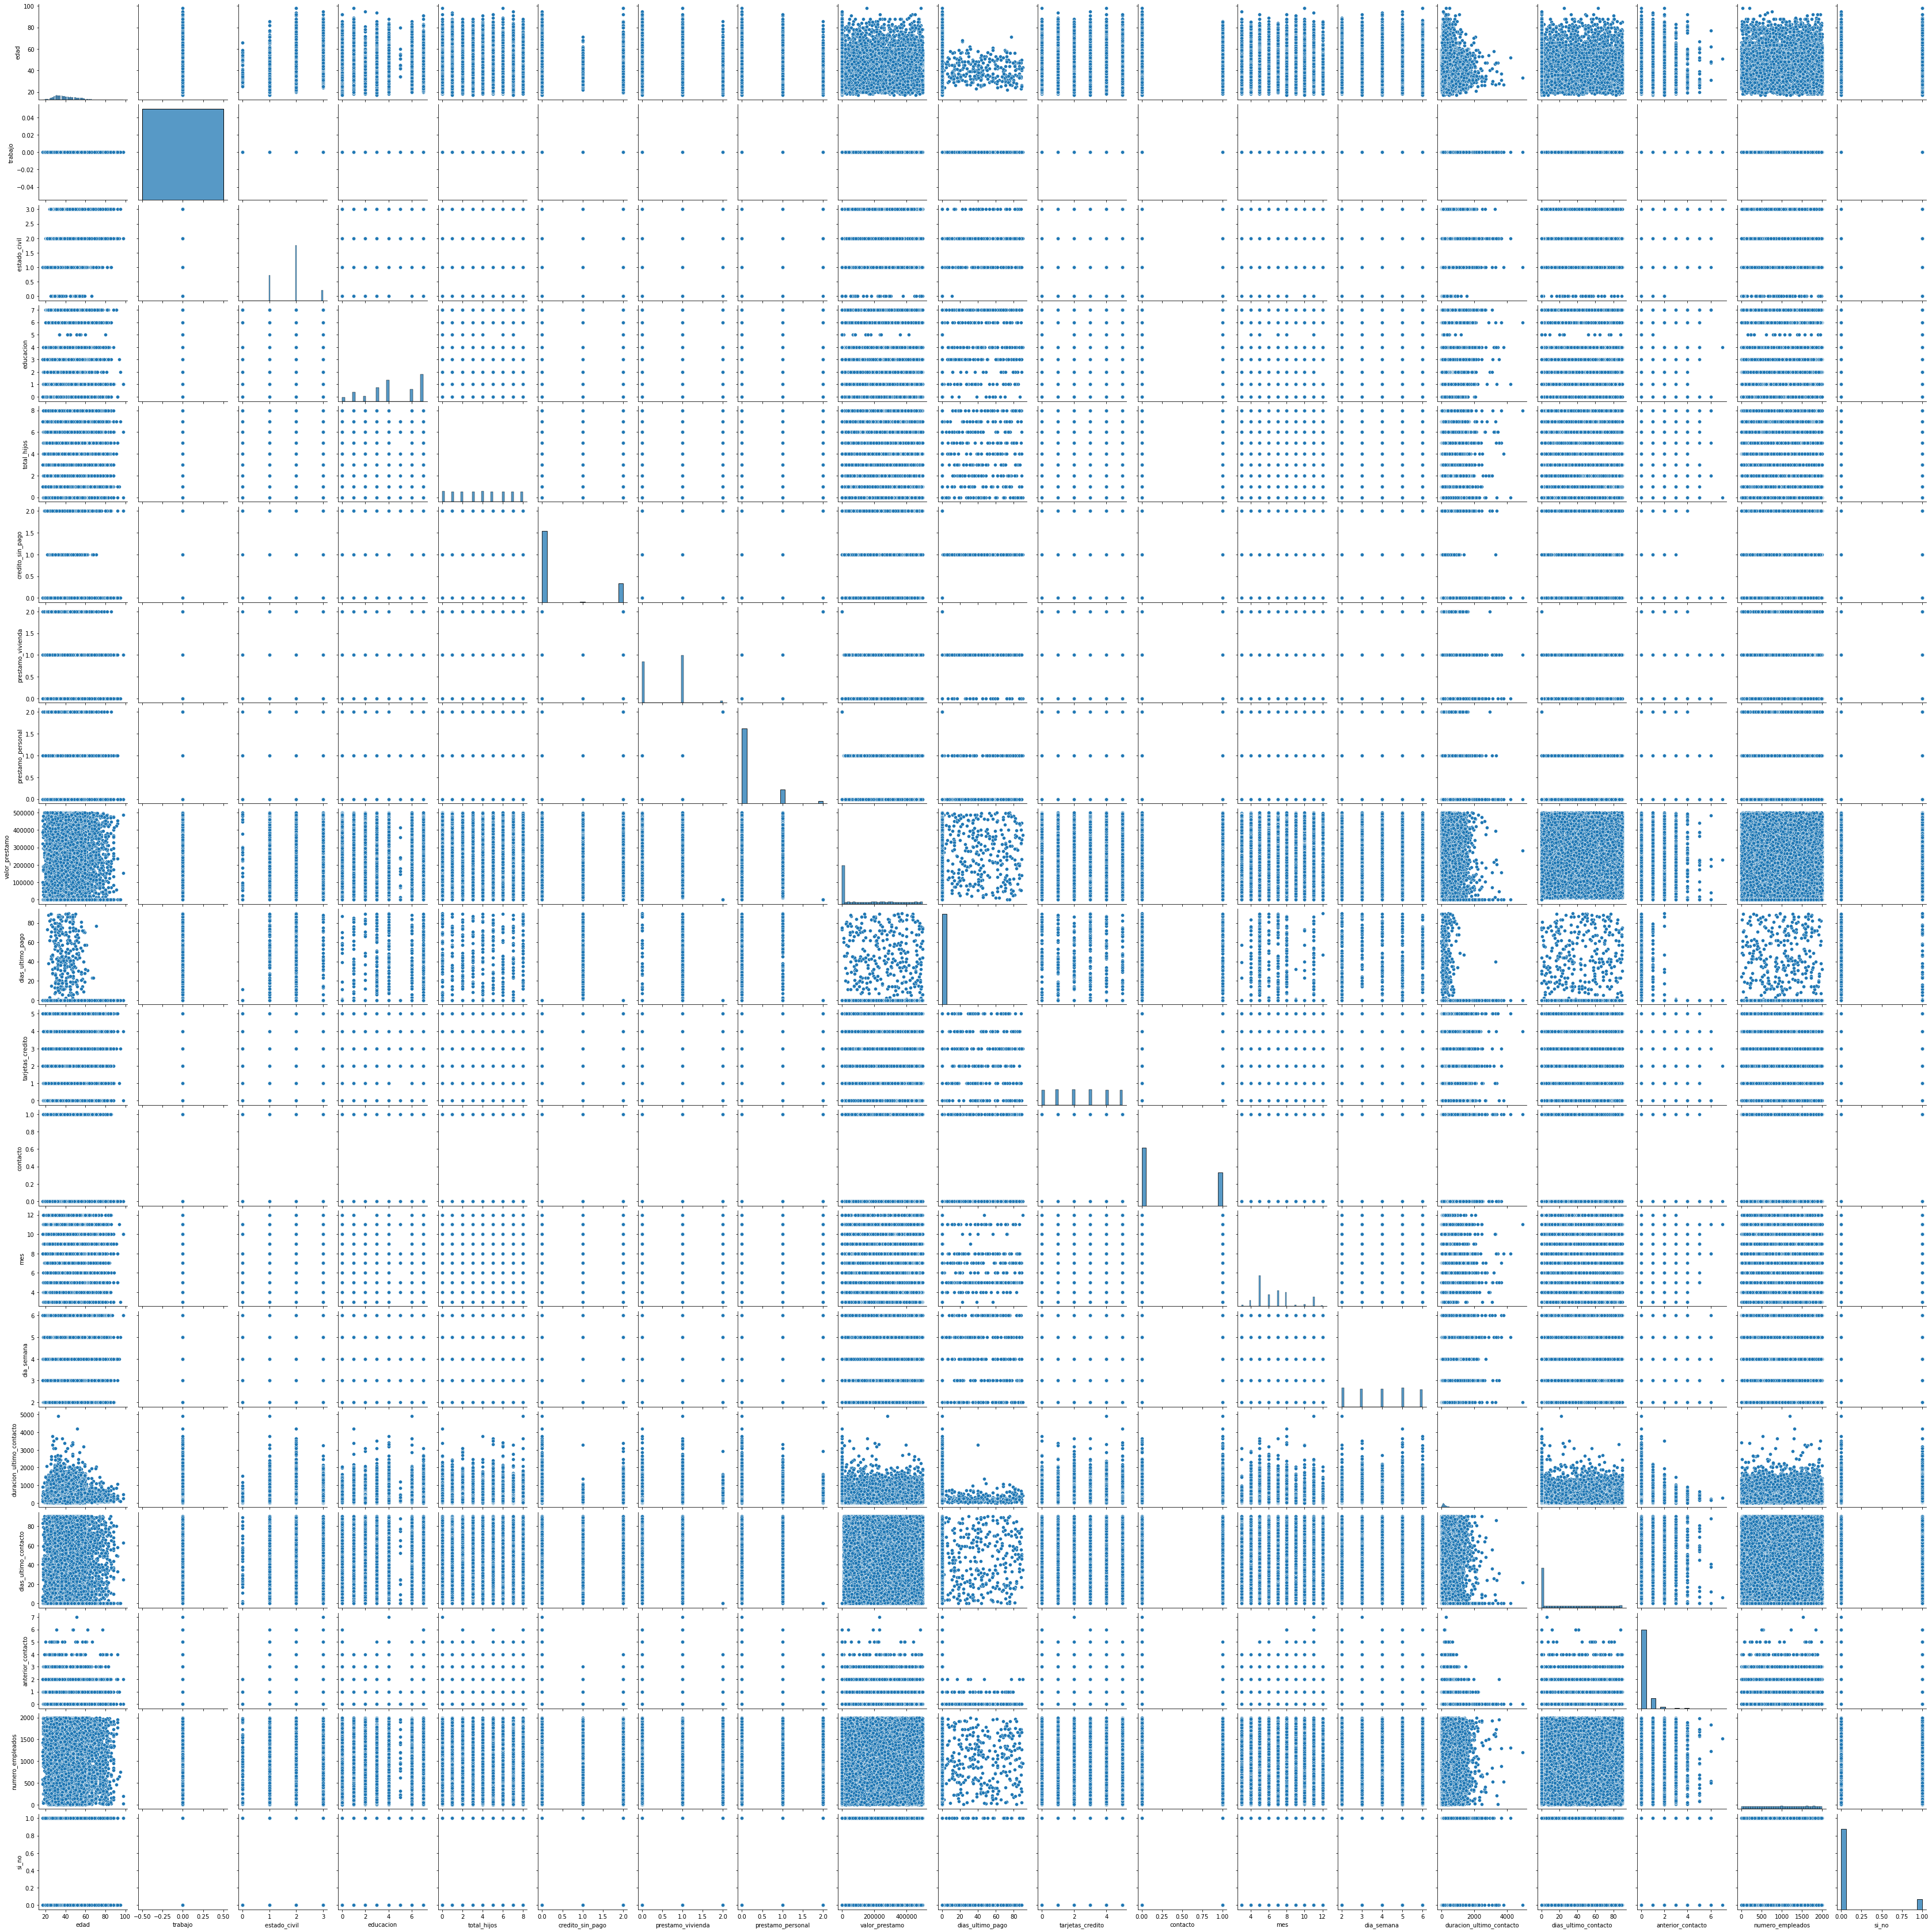

In [ ]:
sns.pairplot(data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWar

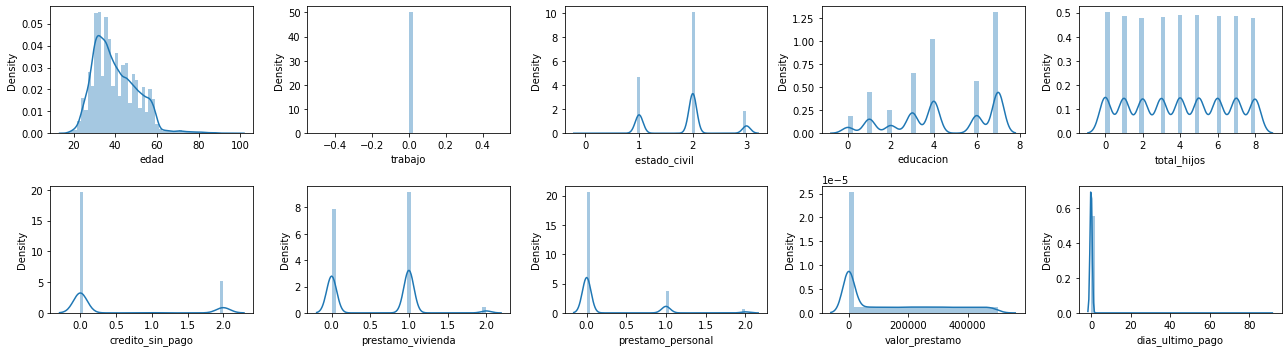

In [ ]:
rows = 2
cols = 5

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(18,5))

col = data.columns
index = 0

for i in range(rows):
  for j in range(cols):
    sns.distplot(data[col[index]], ax=ax[i][j])
    index += 1

plt.tight_layout()

#Responder algunas preguntas

Edad Promedio de los que dijeron SI

In [ ]:
data[data['si_no']==1]['edad'].mean()

40.91314655172414

Edad Promedio de los que dijeron NO

In [ ]:
data[data['si_no']==0]['edad'].mean()

39.911185290576775

Promedio de Hijos

In [ ]:
data[data['si_no']==0]['edad'].mean()

39.911185290576775

Cantidad de personas según su estado Civil

In [ ]:
data['estado_civil '].value_counts()

2    24928
1    11568
3     4612
0       80
Name: estado_civil , dtype: int64

Cantida de personas según su trabajo

In [ ]:
data['educacion'].value_counts()

7    12168
4     9515
3     6045
6     5243
1     4176
2     2292
0     1731
5       18
Name: educacion, dtype: int64

#Construir el modelo de Regresión Logística

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [ ]:
X = data.drop('si_no', axis=1)
y = data.si_no

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

In [ ]:
x_train.shape

(32950, 18)

In [ ]:
logistic_regression = LogisticRegression()

In [ ]:
logistic_regression.fit(X, y)

LogisticRegression()

In [ ]:
y_prediction = logistic_regression.predict(x_test)
print(y_prediction)

[0 0 1 ... 0 0 0]


In [ ]:
accuracy = metrics.accuracy_score(y_test, y_prediction)
print('Exactitud= ' + str(100*accuracy) + "%")

Exactitud= 88.8443797038116%
